In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.plotting import andrews_curves,radviz
import math as ma
from scipy.stats import norm  

C:\Users\JUHI\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#size 100 cm of dustbin
#df = pd.DataFrame(np.random.randint(40,100,size=(168, 8)), columns=list('ABCDEFGH'))
#df.head()

In [3]:
def fun(x):
    ma.radians(x)
    alpha=0.01
    beta=0.02
    z=alpha*ma.sin(x)+beta*ma.cos(x)
    return z
# np.random.normal(mu, sigma, 1000)

In [4]:
#for i in range(10,500):
#df = pd.DataFrame(np.random.normal(100,0.5,size=(168,24)), columns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'])
df1 = pd.DataFrame(np.random.normal(100,5,size=(168,12)), columns=['3','4','5','6','7','8','9','10','11','12','13','14'])
#df = pd.DataFrame(np.random.normal(100,0.5,size=(168,24)), columns=['15','16','17','18','19','20','21','22','23','24','1','2'])
df1.head()

,3,4,5,6,7,8,9,10,11,12,13,14
0,92.730961,104.698362,95.970662,100.083375,106.766170,102.174057,104.478399,96.942083,100.172428,97.482228,103.812261,103.457215
1,100.541382,94.078756,102.934025,100.250469,104.344506,99.783484,100.788806,100.697384,96.122800,88.624410,97.160787,107.934939
2,103.576344,100.394610,105.623284,96.459258,97.548454,110.263796,102.952168,100.338789,107.795582,107.243779,103.462633,99.446508
3,104.605834,101.357107,93.334283,95.806383,102.022779,96.491003,100.417095,95.313469,97.590131,102.078975,104.693982,92.779898
4,102.889911,96.865988,105.211597,95.292652,100.161672,102.516303,87.047124,102.819732,104.731883,97.516859,92.790582,96.489869


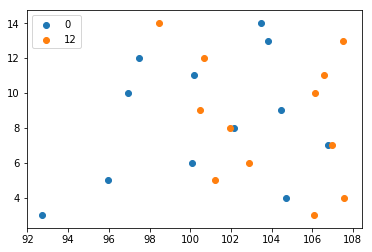

In [5]:
filtered_df = df1.iloc[[0,12],:]
#filtered_df = df.iloc[(df.index == 3) | (df.index == 0),:]

loc = list(map(float, df1.columns))

fig, ax = plt.subplots()
for row in filtered_df.iterrows():
    ax.scatter(row[1], loc, label=row[1].name)

plt.legend()    
plt.show()

In [6]:
df2 = pd.DataFrame(np.random.normal(100,0.5,size=(168,12)), columns=['15','16','17','18','19','20','21','22','23','24','1','2'])
df2.head()

,15,16,17,18,19,20,21,22,23,24,1,2
0,100.244438,100.789989,99.770787,100.159269,100.897602,99.403175,100.098147,100.192332,100.057500,99.971617,100.253171,99.239292
1,99.481682,99.571335,99.952252,100.104382,100.466470,99.837142,99.862836,99.521507,100.161837,99.866009,99.719212,99.881174
2,100.183755,101.217313,99.991792,99.636604,100.223698,100.248824,100.206329,98.948989,100.193425,99.035474,100.219510,100.235598
3,101.258564,99.961290,99.826141,100.586406,100.152019,100.722523,99.622722,99.714439,100.066883,99.730887,100.033791,100.985611
4,99.554007,99.850768,100.276027,100.317093,101.005218,99.542395,100.486497,100.434113,100.240437,100.775048,99.318481,100.314156


In [7]:
df= pd.concat([df1, df2], axis=1)
df.head()

,3,4,5,6,7,8,9,10,11,12,...,17,18,19,20,21,22,23,24,1,2
0,92.730961,104.698362,95.970662,100.083375,106.766170,102.174057,104.478399,96.942083,100.172428,97.482228,...,99.770787,100.159269,100.897602,99.403175,100.098147,100.192332,100.057500,99.971617,100.253171,99.239292
1,100.541382,94.078756,102.934025,100.250469,104.344506,99.783484,100.788806,100.697384,96.122800,88.624410,...,99.952252,100.104382,100.466470,99.837142,99.862836,99.521507,100.161837,99.866009,99.719212,99.881174
2,103.576344,100.394610,105.623284,96.459258,97.548454,110.263796,102.952168,100.338789,107.795582,107.243779,...,99.991792,99.636604,100.223698,100.248824,100.206329,98.948989,100.193425,99.035474,100.219510,100.235598
3,104.605834,101.357107,93.334283,95.806383,102.022779,96.491003,100.417095,95.313469,97.590131,102.078975,...,99.826141,100.586406,100.152019,100.722523,99.622722,99.714439,100.066883,99.730887,100.033791,100.985611
4,102.889911,96.865988,105.211597,95.292652,100.161672,102.516303,87.047124,102.819732,104.731883,97.516859,...,100.276027,100.317093,101.005218,99.542395,100.486497,100.434113,100.240437,100.775048,99.318481,100.314156


In [8]:
df=df.values

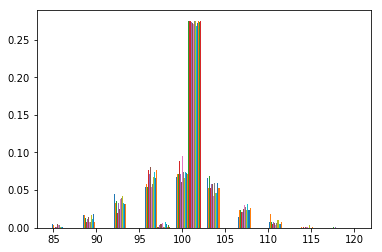

In [9]:
mu=100
sigma=5
count, bins, ignored = plt.hist(df, 10, normed=True)
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()